Website link: https://andersnielsen77.github.io/update/2024/05/06/final-assignment.html

## Motivation

### What is your dataset?

The dataset is from Kaggle and is called 'Global Electricity Production Data'. It includes daily data of the energy production of 48 countries from 2010 to 2023. The dataset includes information about how the electricity has been produced (solar, wind, coal, nuclear, etc.) and how much is produced, exported and imported in the country. We also use additional data about the number of windmills in Denmark and their capacity, from 'Energistyrelsen'.

### Why did you choose this/these particular dataset(s)?

This dataset was chosen as it seemed straightforward to work with, including daily data which changes over time, explanatory data (what type of energy was produced), and geographical data (production for the different countries). It is quite a large dataset which could provide some insightful analyses regarding the development in the energy production, and the possibility to use the data for machine learning. The windmill data from Energistyrelsen is used to normalize data for how the production of wind energy has changed in Denmark, so the production is proportionate to the actual production capacity.

### What was your goal for the end user's experience?

The goal for the end user’s experience is to tell a story of how the production of energy (especially renewable energy) has changed since 2010 and compare the energy production in Sweden and Denmark. This is supported by some cool and insightful visualizations. We also want to connect this to the social climate and public opinion around nuclear energy and renewable energy.


In [17]:
import pandas as pd

df = pd.read_csv('global_electricity_production_data.csv')
df['Date'] = pd.to_datetime(df['date'], format="%m/%d/%Y")
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df = df.drop(columns=['date'])
# Changing name of the United States to match with geomap data
df['country_name'] = df['country_name'].replace('United States', 'United States of America')

print("The number of rows in the data is: ", len(df))
print("The number of columns/variables in the data is: ", len(df.columns))

df.head()

The number of rows in the data is:  121074
The number of columns/variables in the data is:  8


,country_name,parameter,product,value,unit,Date,Year,Month
0,Australia,Net Electricity Production,Electricity,22646.1901,GWh,2023-12-01,2023,12
1,Australia,Net Electricity Production,Total Combustible Fuels,13397.9356,GWh,2023-12-01,2023,12
2,Australia,Net Electricity Production,"Coal, Peat and Manufactured Gases",9768.5223,GWh,2023-12-01,2023,12
3,Australia,Net Electricity Production,Oil and Petroleum Products,289.5415,GWh,2023-12-01,2023,12
4,Australia,Net Electricity Production,Natural Gas,3091.9272,GWh,2023-12-01,2023,12


## Basic stats
### Write about your choices in data cleaning and preprocessing
During the data cleaning and preprocessing phase, we initially checked for the presence of NA-values, finding none. However, some countries were missing from the dataset, and others lacked statistics for the entire date range. Fortunately, these missing entries did not affect our project. While the data itself was clean, we still needed to preprocess it. Our first step involved loading the 'Global Electricity Production Data' from the .csv file into a Pandas dataframe and converting the dates to the appropriate format (datetime).

We also made some basic bar charts to investigate the trends, like total production over time and total production per country, and here it was discovered that several countries were not included in the data before 2014. We therefore decided not to do further analysis on the energy production from any of these countries.  

### Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis
The dataset contains 121,074 rows and 6 columns, capturing daily data on electricity production across multiple countries and energy types and includes various forms of energy production such as solar, wind, coal, and nuclear power. Initial checks revealed no missing values for the main variables of interest, suggesting a high level of data completeness.

The aggregated data by country and type of energy production provided insights into the dominant energy sources per region. A line graph of total net electricity production over time illustrates a general increase in electricity production globally. This aligns with global economic growth and the expansion of energy infrastructures. Noteworthy is the steady increase in renewable energy production, which suggests a shift towards greener energy sources in response to global environmental policies. A bar chart showing total net electricity production by country highlighted leaders in energy production like the United States and China, furthermore, a second bar chart consistent of the sources of energy production by contry, these visualizations helped identify key players in both renewable and non-renewable sectors and the amount of energy produced by each.

In [18]:
print("--------------------------")
print("Products:")
for prod in df['product'].unique():
    print(f"{prod}")
print("--------------------------")
print("Parameters:")
for param in df['parameter'].unique():
    print(f"{param}")

--------------------------
Products:
Electricity
Total Combustible Fuels
Coal, Peat and Manufactured Gases
Oil and Petroleum Products
Natural Gas
Combustible Renewables
Hydro
Wind
Solar
Total Renewables (Hydro, Geo, Solar, Wind, Other)
Other Combustible Non-Renewables
Geothermal
Not Specified
Nuclear
Data is estimated for this month
Other Renewables
--------------------------
Parameters:
Net Electricity Production
Used for pumped storage
Distribution Losses
Final Consumption (Calculated)
Total Imports
Total Exports
Remarks


### Imports ###

In [19]:
# Standard libraries
import calendar
import numpy as np

# Data manipulation
import pandas as pd
import geopandas as gpd

# Machine Learning
from sklearn.linear_model import LinearRegression

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool, Legend
from bokeh.io import output_notebook
from bokeh.palettes import Category20
from bokeh.core.properties import value

import folium
from folium.plugins import TimestampedGeoJson
import branca.colormap as cm

from shapely.geometry import MultiPolygon, Polygon

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px


## Plot 1: Total Net Electricity Production Over Time
This line graph tracks the global electricity production from 2010 to 2023. It’s designed to clarify how electricity production has evolved, and spot potential outliers in our data. The graph uses a simple line with markers at each data point, which helps in identifying yearly trends and anomalies. It allows for quick comprehension of scale changes over time. 

A finding from this graph was that certain countries lack in the years 2010-2014, which impacted our analysis further on - selecting only countries to analyze where we have data for the entire timeperiod. We did however not end up using this plot in our website, since it doesn't give any immediate insights in the research question.

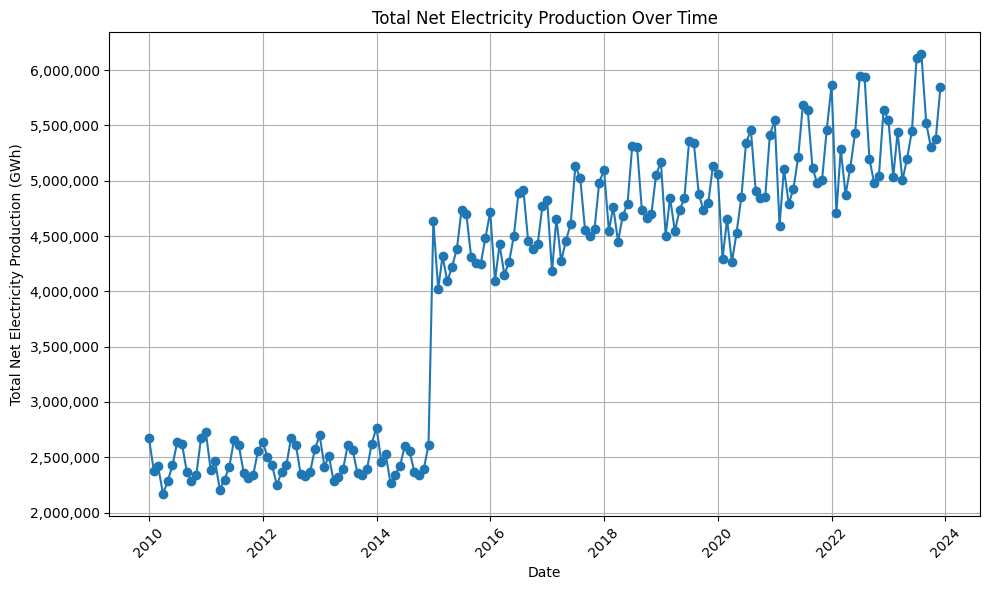

In [20]:
# Selecting only net electricity production
net_elec_prod = df[df['parameter'] == 'Net Electricity Production']
# Grouping by Date and suumming energy per date for all countries
total_net_elec_prod_over_time = net_elec_prod.groupby('Date')['value'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(total_net_elec_prod_over_time['Date'], total_net_elec_prod_over_time['value'], marker='o')
plt.title('Total Net Electricity Production Over Time')
plt.xlabel('Date')
plt.ylabel('Total Net Electricity Production (GWh)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Plot 2: Total Net Electricity Production by Country 
A bar chart that showcases the electricity production comparison across different countries, highlighting which nations are the leading producers. By sorting the bars in descending order, it provides a clear, immediate visual representation of each country's production magnitude relative to others. This helps identify key players in the global energy market and can prompt deeper analysis into the factors driving these production volumes, such as natural resources, technological advancement, or government policy.

This plot was not used in our website but was a good indicator of showing world leaders in production and checking whether the data had some sense to it.

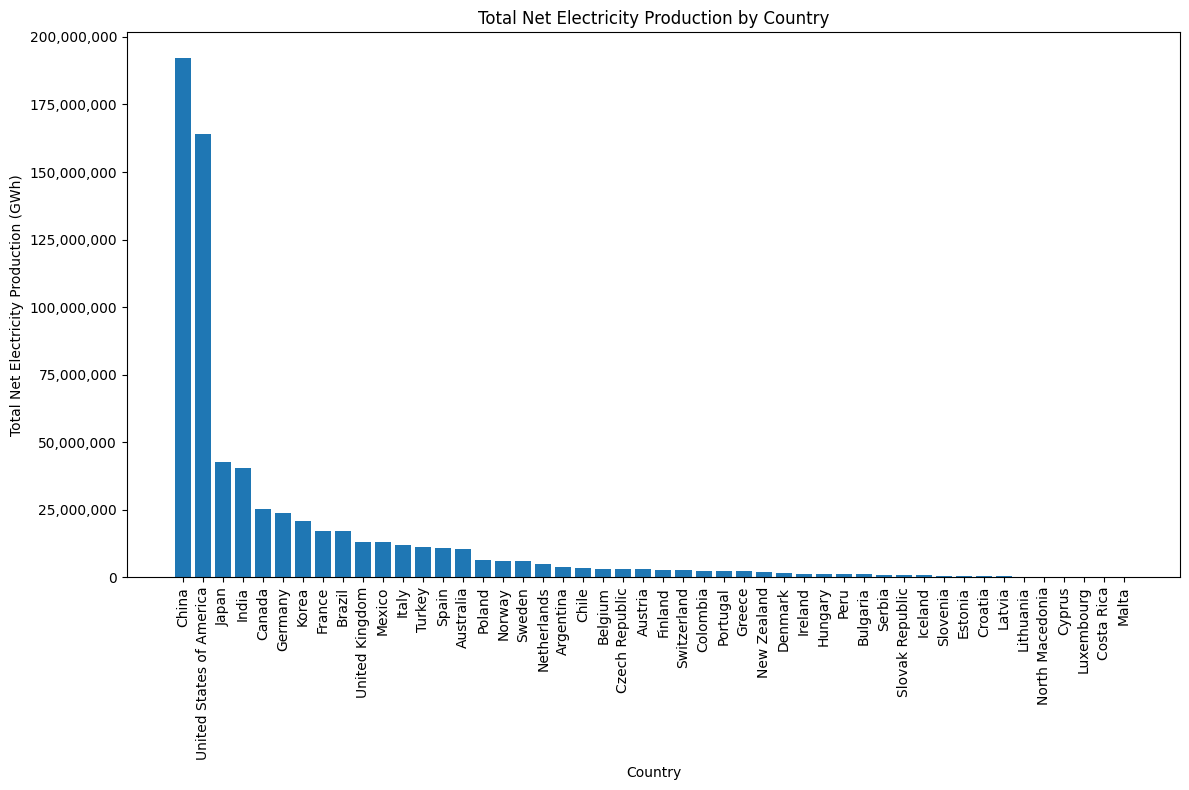

In [21]:
# Group net electricity by country and sum production per country
total_net_elec_prod_by_country = net_elec_prod.groupby('country_name')['value'].sum().reset_index()
total_net_elec_prod_by_country = total_net_elec_prod_by_country.sort_values('value', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(total_net_elec_prod_by_country['country_name'], total_net_elec_prod_by_country['value'])
plt.title('Total Net Electricity Production by Country')
plt.xlabel('Country')
plt.ylabel('Total Net Electricity Production (GWh)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Plot 3: Net Electricity Production by Energy Source and Country
This stacked bar chart offers a detailed breakdown of electricity production by different energy sources within each country. It allows viewers to discern not only the total output but also the composition of that output—whether a country is relying more on fossil fuels, nuclear, or renewable sources. This visualization is good for assessing each country's energy strategy and their progress toward renewable energy adoption. The color coding for different energy sources makes comparisons intuitive, and the interactive element (hover tool) enriches the user experience by providing specific data points on demand.

This plot was used to get an indication of the composition of energy sources in each countries but was not included in the website.

In [22]:
# Pivot data on Country Name and product to get sum of production per product per country
pivot_table = df.pivot_table(index='country_name', columns='product', values='value', aggfunc='sum').fillna(0)
countries = list(pivot_table.index)
products = list(pivot_table.columns)

num_colors = min(len(products), 20)
colors = Category20[num_colors]

# Define plot
p = figure(x_range=countries, height=900, width=1800, title="Net Electricity Production by Energy Source and Country",
           toolbar_location=None, tooltips="@products: @$name")

cumulative_height = {country: 0 for country in countries}

renderers = []
for indx, product in enumerate(products):
    heights = pivot_table[product].tolist()
    bottoms = [cumulative_height[country] for country in countries]
    tops = [bottoms[i] + height for i, height in enumerate(heights)]
    
    source = ColumnDataSource(data={
        'countries': countries,
        'bottoms': bottoms,
        'tops': tops,
        'colors': [colors[indx % len(colors)] for _ in countries],
        'product': [product for _ in countries]
    })
    
    renderer = p.vbar(x='countries', bottom='bottoms', top='tops', width=0.9, source=source,
                      color='colors', legend_label=product, muted_color='colors', muted_alpha=0.2)
    
    for i, country in enumerate(countries):
        cumulative_height[country] += heights[i]

    renderers.append(renderer)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

# Hover tool
hover = HoverTool()
hover.tooltips = [("Product", "@product"), ("Value", "@tops{0.0}")]
p.add_tools(hover)

p.legend.visible = False

# Define legend
legend = Legend(items=[(product, [renderer]) for product, renderer in zip(products, renderers)], location=(0, -30))
p.add_layout(legend, 'right')
p.legend.click_policy="mute" 

output_notebook()
show(p)


Loading BokehJS ...

## Plot 4: Map - Percentage of Renewable Energy Production
Using a choropleth map, this visualization illustrates the percentage of electricity produced from renewable sources by country, updated yearly. It's a powerful tool for visualizing geographical trends and the adoption rate of renewable energy technologies worldwide. Colors indicate the percentage of renewable energy, providing a clear visual indicator of how green a country's energy production is. This map is interactive, allowing users to focus on specific years and see how policies or technologies have shifted the renewable energy landscape over time.

This serves as a great overview of each county's adaptation of renewables in our webpage, and shows quick patters in the yearly developments.

In [23]:
total_production_by_country = df.pivot_table(
    values='value',
    index=['country_name', 'Year'],
    columns='product',
    aggfunc='sum',
    fill_value=0
).reset_index()

total_production_by_country = total_production_by_country.rename(columns={
    'Total Combustible Fuels': 'non_renewable',
    'Nuclear': 'nuclear',
    'Total Renewables (Hydro, Geo, Solar, Wind, Other)': 'renewable'
})

total_production_by_country['total_energy'] = total_production_by_country['renewable'] + total_production_by_country['nuclear'] + total_production_by_country['non_renewable']

total_production_by_country['percentage'] = (total_production_by_country['renewable'] / total_production_by_country['total_energy']) * 100
total_production_by_country['non_renewable_percentage'] = (total_production_by_country['non_renewable'] / total_production_by_country['total_energy']) * 100

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_df3 = pd.DataFrame(world.drop(columns='geometry'))
world = world.merge(total_production_by_country, how='left', left_on='name', right_on='country_name')

#Function from: https://stackoverflow.com/questions/63790738/can-you-reverse-the-order-of-a-branca-colormap
def reversed_colormap(existing):
    return cm.LinearColormap(
        colors=list(reversed(existing.colors)),
        vmin=existing.vmin, vmax=existing.vmax
    )
    
colormap = cm.linear.plasma.scale(0, 100).to_step(10)

colormap = reversed_colormap(colormap)
features = []
for index, row in world.iterrows():
    if pd.notna(row['Year']) and pd.notna(row['percentage']):
        if isinstance(row['geometry'], MultiPolygon):
            for polygon in row['geometry'].geoms:
                feature = {
                    "type": "Feature",
                    "properties": {
                        "style": {
                            "color": colormap(row['percentage']),
                            "weight": 1,
                            "fillOpacity": 0.6
                        },
                        "time": f"{int(row['Year'])}-01-01T00:00:00Z",
                        "tooltip": f"<strong>Country:</strong> {row['name']}<br><strong>Percentage renewable energy:</strong> {row['percentage']:.2f}%"
                    },
                    "geometry": polygon.__geo_interface__
                }
                features.append(feature)
        elif isinstance(row['geometry'], Polygon):
            feature = {
                "type": "Feature",
                "properties": {
                    "style": {
                        "color": colormap(row['percentage']),
                        "weight": 1,
                        "fillOpacity": 0.6
                    },
                    "time": f"{int(row['Year'])}-01-01T00:00:00Z",
                    "tooltip": f"<strong>Country:</strong> {row['name']}<br><strong>Percentage renewable energy:</strong> {row['percentage']:.2f}%"
                },
                "geometry": row['geometry'].__geo_interface__
            }
            features.append(feature)

m = folium.Map(location=[20, 0], zoom_start=2)

TimestampedGeoJson(
    {
        "type": "FeatureCollection",
        "features": features
    },
    period="P1Y",
    add_last_point=False,
    auto_play=True,
    loop=True,
    max_speed=1,
    loop_button=True,
    date_options="YYYY",
    time_slider_drag_update=True
).add_to(m)

colormap.caption = "Percentage of Renewable Energy Production"
colormap.add_to(m)

m

/var/folders/w2/8rmmpmtx2g342y_vl4cf27gm0000gn/T/ipykernel_66987/1553485302.py:20: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


## Plot 5: Annual Total Electricity Production in Denmark and Sweden
This line graph compares the annual electricity production from various sources in Denmark and Sweden. By showing different energy types like wind, solar, and nuclear, the graph highlights each country’s energy portfolio and how it has evolved. This side-by-side comparison is especially useful for analyzing how similar or different policies in neighboring countries can lead to distinct energy paths. The use of distinct colors for each energy type aids in quick differentiation and understanding of trends.

This plot is used on the webpage to show the differences in renewable strategies in Denmark and Sweden, since they vary a lot due to different political and geographical factors.

In [24]:
# Select data from dk and sw with selected energy types renewables
df_dksw = df[df['country_name'].isin(['Denmark', 'Sweden'])]
energy_types = ['Wind', 'Other Renewables', 'Nuclear', 'Geothermal', 'Solar', 'Hydro']
df_dksw_energy = df_dksw[df_dksw['product'].isin(energy_types)]

# Sum product values per year and country
pivot_df = df_dksw_energy.pivot_table(index=['Year', 'country_name'], columns='product', values='value', aggfunc='sum').fillna(0)

colors_scale = px.colors.sequential.Plasma
colors = {etype: colors_scale[i * len(colors_scale) // len(energy_types)] for i, etype in enumerate(energy_types)}

# Plotting
fig = make_subplots(rows=1, cols=2, subplot_titles=['Denmark', 'Sweden'], horizontal_spacing=0.05)

for i, country in enumerate(['Denmark', 'Sweden'], start=1):
    filtered_df = pivot_df.xs(country, level='country_name')
    for energy_type in energy_types:
        fig.add_trace(go.Scatter(
            x=filtered_df.index.get_level_values('Year'),
            y=filtered_df[energy_type],
            name=energy_type,
            stackgroup=f'{country}',
            mode='lines',
            fill='tonexty',
            line=dict(width=0.5),
            marker_color=colors[energy_type],
            legendgroup=energy_type,
            showlegend=(i == 1)
        ), row=1, col=i)

fig.update_layout(
    title='Annual Renewables and Nuclear Electricity Production in Denmark and Sweden',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.3,
        xanchor="center",
        x=0.5,
    ),
    yaxis_title='Electricity Production (GWh)',
    margin=dict(l=0, r=0, t=70, b=0),
    legend_title='Energy Type'
)

fig.update_xaxes(title_text="Year", row=1, col=1)
fig.update_xaxes(title_text="Year", row=1, col=2)

fig.update_xaxes(tickangle=45)

fig.show()

## Plot 6: Normalized Monthly Wind Production for Denmark
This line graph presents wind energy production in Denmark, normalized against windmill capacity to reflect efficiency and effectiveness. It compares the actual monthly production in 2021 against the average from 2010 to 2020, offering insights into operational performance and year-to-year variability. The normalization process helps in understanding whether changes in production are due to increased capacity or other factors like weather conditions. This graph uses different colors to distinguish between the two comparison periods, enhancing readability.

The plot serves as an indicator of how the varying wind conditions in Denmark can make it hard to use wind as a reliable source of renewable energy. 

In [25]:
##Including data from Energistyrelsen - capacity of windmills in Denmark##
# SOURCE: https://ens.dk/service/statistik-data-noegletal-og-kort/data-oversigt-over-energisektoren
data = {
    "Year": [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "Number of Facilities": [5060, 5179, 5628, 5961, 6013, 6500, 6825, 6860, 6969, 6944, 6924, 6990, 6969, 6974],
    "Capacity kW": [3801803, 3953229, 4165464, 4823001, 4890487, 5080878, 5249464, 5492884, 6118160, 6106022, 6320082, 7007859, 7103811, 7280926]
}

# Transform to pandas
df_wind_capacity = pd.DataFrame(data)
df_wind_capacity['Year'] = df_wind_capacity['Year'].astype(int)


# Map numeric month to month names
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
             7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Filter data
recent_years = df[
    (df['country_name'].isin(['Sweden', 'Denmark'])) & 
    (df['parameter'] == 'Net Electricity Production') & 
    (df['product'] == 'Wind')
]

# Apply month mapping
recent_years['Month'] = recent_years['Month'].map(month_map)

# Convert 'Month' into a categorical type with ordered categories
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
recent_years['Month'] = pd.Categorical(recent_years['Month'], categories=month_order, ordered=True)

# Create a pivot table for monthly data
monthly_production_by_country = recent_years.pivot_table(
    values='value',
    index=['country_name', 'Month', 'Year'],
    columns='product',
    aggfunc='sum',
    fill_value=0
).reset_index()

monthly_production_by_country.columns = monthly_production_by_country.columns.map('_'.join if type(monthly_production_by_country.columns) is pd.MultiIndex else str)

# Normalize data with the windmill data
normalized_data = pd.merge(
    monthly_production_by_country,
    df_wind_capacity,
    on='Year',
    how='left'
)
normalized_data['Wind_normalized'] = normalized_data['Wind'] / normalized_data['Capacity kW']

# Extract year 2021 for Denmarkk
denmark_2021 = normalized_data[
    (normalized_data['country_name'] == 'Denmark') & 
    (normalized_data['Year'] == 2021)
]

# Compute average for Denmark from 2010 to 2020
average_2010_2020 = normalized_data[
    (normalized_data['country_name'] == 'Denmark') & 
    (normalized_data['Year'].between(2010, 2020))
].groupby('Month').agg(
    average_value=('Wind_normalized', 'mean')
).reset_index()

# Ensure that the 'Month' in average_2010_2020 is also a categorical type with ordered categories
average_2010_2020['Month'] = pd.Categorical(average_2010_2020['Month'], categories=month_order, ordered=True)
average_2010_2020.sort_values('Month', inplace=True)

# Get the Plasma color scale from Plotly Express
plasma_colors = px.colors.sequential.Plasma

# For visuals
denmark_2021['Wind_normalized'] *= 1000000
average_2010_2020['average_value'] *= 1000000


## Plotting
fig = go.Figure()

# Adding Denmark 2021 normalized wind production data
fig.add_trace(go.Scatter(
    x=denmark_2021['Month'],
    y=denmark_2021['Wind_normalized'],
    mode='lines+markers',
    name='Denmark 2021',
    line=dict(color=plasma_colors[3]) 
))

# Adding average monthly data from 2010 to 2020
fig.add_trace(go.Scatter(
    x=average_2010_2020['Month'],
    y=average_2010_2020['average_value'],
    mode='lines+markers',
    name='Average 2010-2020',
    line=dict(color=plasma_colors[8])  
))

# Update the layout to add titles and improve readability
fig.update_layout(
    title='Normalized Monthly Wind Production for Denmark',
    xaxis_title='Month',
    yaxis_title='Normalized Production',
    yaxis=dict(
        tickformat=".0f"  
    ),
    legend_title='',
    xaxis=dict(tickmode='array', tickvals=list(range(0, 12)), ticktext=list(calendar.month_abbr[1:13])),
)

fig.update_layout(
    margin=dict(l=0, r=0, t=60, b=50),
    width=700,  
    height=500   
)

fig.update_layout(
    legend=dict(
        orientation = 'h',
        yanchor="bottom",
        y = -0.21,
        x = 0.22,
        itemclick='toggle',  
        itemdoubleclick=False  
    )
)


fig.update_layout(
    yaxis=dict(
        tickformat=",.0f"  
    )
)

# Show the figure
fig.show()



/var/folders/w2/8rmmpmtx2g342y_vl4cf27gm0000gn/T/ipykernel_66987/3002150581.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/w2/8rmmpmtx2g342y_vl4cf27gm0000gn/T/ipykernel_66987/3002150581.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/w2/8rmmpmtx2g342y_vl4cf27gm0000gn/T/ipykernel_66987/3002150581.py:75: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

## Plot 7: Monthly Electricity Handling Breakdown by Country
A complex multi-part line graph that displays how Denmark and Sweden manage their electricity through production, imports, and exports each month. It calculates and visualizes the percentage of electricity handled via these different means, offering insights into the countries’ energy independence or reliance on external energy sources. 

The visualisation is used to show how Denmark is way more dependent on imports during summer months due to the variations in weather and so on. This is therefore a crucial graph for our webpage.

In [26]:
# Select electricity data for import export and production
elec = df[
    (df['parameter'].isin(['Net Electricity Production','Total Imports', 'Total Exports'])) &
    (df['country_name'].isin(['Denmark', 'Sweden'])) &
    (df['product'] == 'Electricity') 
]

# Subtract exports from production
elec['total_handled'] = elec.apply(
    lambda row: row['value'] if row['parameter'] == 'Net Electricity Production' else (row['value'] if row['parameter'] == 'Total Imports' else -row['value']),
    axis=1
)

# Create a pivot table to sum values for production, imports, and exports
pivot = elec.pivot_table(
    values='total_handled',
    index=['country_name', 'Year', 'Month'],
    columns='parameter',
    aggfunc='sum',
    fill_value=0
)

# Calculate the net total (Production + Imports - Exports)
pivot['Net Total'] = pivot['Net Electricity Production'] + pivot['Total Imports'] - pivot['Total Exports']

# Calculate percentages
pivot['Production %'] = pivot['Net Electricity Production'] / pivot['Net Total'] * 100
pivot['Imports %'] = pivot['Total Imports'] / pivot['Net Total'] * 100
pivot['Exports %'] = -pivot['Total Exports'] / pivot['Net Total'] * 100 


# Group by country_name and Month to average the percentages
monthly_avg = pivot.groupby(['country_name', 'Month']).agg({
    'Production %': 'mean',
    'Imports %': 'mean',
    'Exports %': 'mean'
}).reset_index()

subplot_titles = [f"{country}" for country in monthly_avg['country_name'].unique()]
fig = make_subplots(rows=len(monthly_avg['country_name'].unique()), cols=1, 
                    shared_xaxes=True, vertical_spacing=0.05, subplot_titles=subplot_titles)


colors = px.colors.sequential.Plasma  

# Define specific indices for each category to use consistently
color_production = colors[1]  
color_imports = colors[4]     
color_exports = colors[6]     


## Plotting
for idx, country in enumerate(monthly_avg['country_name'].unique(), start=1):
    country_data = monthly_avg[monthly_avg['country_name'] == country].sort_values(by='Month')
    show_legend = idx == 1  

    # Define a hovertemplate
    hovertemplate = '<b>%{y:.2f}%</b><extra>%{fullData.name}</extra>'

    fig.add_trace(go.Scatter(
        x=country_data['Month'], y=country_data['Production %'], name='Production %',
        mode='lines', line=dict(width=0.5, color=color_production), fill='tonexty',
        stackgroup='one', showlegend=show_legend,
        hoverinfo='y+name', hovertemplate=hovertemplate
    ), row=idx, col=1)

    fig.add_trace(go.Scatter(
        x=country_data['Month'], y=country_data['Imports %'], name='Imports %',
        mode='lines', line=dict(width=0.5, color=color_imports), fill='tonexty',
        stackgroup='one', showlegend=show_legend,
        hoverinfo='y+name', hovertemplate=hovertemplate
    ), row=idx, col=1)

    fig.add_trace(go.Scatter(
        x=country_data['Month'], y=country_data['Exports %'], name='Exports %',
        mode='lines', line=dict(width=0.5, color=color_exports), fill='tonexty',
        stackgroup='one', showlegend=show_legend,
        hoverinfo='y+name', hovertemplate=hovertemplate
    ), row=idx, col=1)

# Adjust details
fig.update_layout(
    title='Monthly Electricity Handling Breakdown by Country',
    legend_title='Component',
    xaxis2=dict(tickmode='array', tickvals=list(range(1, 13)), ticktext=list(calendar.month_abbr[1:13])),
    xaxis=dict(tickmode='array', tickvals=list(range(1, 13)), ticktext=list(calendar.month_abbr[1:13])),

    yaxis=dict(range=[0, 100])
)

fig.update_layout(
    xaxis2_title='Month',  
    xaxis2=dict(title_standoff=10),
)

fig.add_annotation(
    text="Average Percentage over 2010-2023",  
    xref="paper", x=-0.059, xanchor="center",
    yref="paper", y=0.5, yanchor="middle",
    showarrow=False,
    textangle=-90,  
    font=dict(  
        size=16,  
    )
)

fig.update_layout(
    margin=dict(l=50, r=0, t=60, b=0),
    width=650,  
    height=500  
)

fig.update_layout(
    legend=dict(
        orientation = 'h',
        yanchor="bottom",
        y = -0.16,
        x = 0.15,
        itemclick=False, 
        itemdoubleclick=False  
    )
)

fig.show()

/var/folders/w2/8rmmpmtx2g342y_vl4cf27gm0000gn/T/ipykernel_66987/2247814570.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Plot 8: Percentage of Renewable vs Non-renewable Energy Over Years
This trend analysis graph forecasts changes in the energy mix of Denmark and Sweden, emphasizing the shift towards renewable energy. It plots actual data against a trend line predicted through linear regression, illustrating past progress and anticipated future trends in renewable energy adoption. The use of a split in actual data and trend lines helps in differentiating between observed values and projections helping the observer. Have only made a linear regression for the trend line in plot 8. This is quite a simple form for machine learning, which works well for the analysis we wanted to make, in terms of predicting how much of the countries’ energy production will be renewable in 2030. The python library sklearn is used for the linear regression. 

The plot is used to conclude on whether Denmark and Sweden are going to reach their goals of renewable energy in 2050 and 2040. It serves as a final graph in our webpage.

In [27]:
countries = ['Denmark','Sweden']


# Filter data for only United States and Denmark with the parameter 'Net Electricity Production'
df_dksw = df[(df['country_name'].isin(countries)) & (df['parameter'] == 'Net Electricity Production')]

# Create a pivot table to calculate the sum of 'value' for each product type, grouped by 'country_name' and 'Year'
total_production_by_country = df_dksw.pivot_table(
    values='value',
    index=['country_name', 'Year'],
    columns='product',
    aggfunc='sum',
    fill_value=0
).reset_index()

# Rename the columns to more descriptive names
total_production_by_country = total_production_by_country.rename(columns={
    'Total Combustible Fuels': 'non_renewable',
    'Nuclear': 'nuclear',
    'Total Renewables (Hydro, Geo, Solar, Wind, Other)': 'renewable'
})

# Calculate the total energy production by summing all three types
total_production_by_country['total_energy'] = total_production_by_country['renewable'] + total_production_by_country['nuclear'] + total_production_by_country['non_renewable']

# Calculate the percentage of the total energy that is renewable
total_production_by_country['renewable_percentage_with_nuclear'] = ((total_production_by_country['renewable']+total_production_by_country['nuclear']) / total_production_by_country['total_energy']) * 100

total_production_by_country['renewable_percentage'] = (total_production_by_country['renewable'] / total_production_by_country['total_energy']) * 100
total_production_by_country['non_renewable_percentage'] = (total_production_by_country['non_renewable']/ total_production_by_country['total_energy']) * 100


############################################################################
#### PLOTTING ####
denmark_data = total_production_by_country[total_production_by_country['country_name'] == 'Denmark']
sweden_data = total_production_by_country[total_production_by_country['country_name'] == 'Sweden']

# Prepare the model and predict function
def predict_trend(country_data, column, year_predict=np.arange(2010, 2031)):
    model = LinearRegression()
    years = country_data['Year'].values.reshape(-1, 1)
    percentages = country_data[column].values
    model.fit(years, percentages)
    
    # Predict for the range of years
    predicted_percentages = model.predict(year_predict.reshape(-1, 1))
    return predicted_percentages, model

years_extended = np.linspace(2010, 2030, 300)

# Get predictions and models for renewable percentage
_, denmark_model = predict_trend(denmark_data, 'renewable_percentage')
denmark_trend = predict_trend(denmark_data, 'renewable_percentage', years_extended)[0]

_, sweden_model = predict_trend(sweden_data, 'renewable_percentage')
sweden_trend = predict_trend(sweden_data, 'renewable_percentage', years_extended)[0]

# Get prediction and model for renewable percentage with nuclear for Sweden
sweden_nuclear_trend = predict_trend(sweden_data, 'renewable_percentage_with_nuclear', years_extended)[0]


plasma_colors = px.colors.sequential.Plasma

# Plotting 
fig = go.Figure()

# Plot for Denmark using Plasma colors
fig.add_trace(go.Scatter(x=denmark_data['Year'], y=denmark_data['renewable_percentage'],
                         mode='markers+lines', name='Denmark Actual', marker_color=plasma_colors[1]))

# Trend for Denmark
fig.add_trace(go.Scatter(x=years_extended, y=denmark_trend,
                         mode='lines', name='Denmark Trend', line=dict(color=plasma_colors[1], dash='dash')))

# Plot for Sweden
fig.add_trace(go.Scatter(x=sweden_data['Year'], y=sweden_data['renewable_percentage'],
                         mode='markers+lines', name='Sweden Actual', marker_color=plasma_colors[4]))

# Trend for Sweden
fig.add_trace(go.Scatter(x=years_extended, y=sweden_trend,
                         mode='lines', name='Sweden Trend', line=dict(color=plasma_colors[4], dash='dash')))

# Plot for Sweden with Nuclear
fig.add_trace(go.Scatter(x=sweden_data['Year'], y=sweden_data['renewable_percentage_with_nuclear'],
                         mode='markers+lines', name='Sweden with Nuclear Actual', marker_color=plasma_colors[6]))

# Trend for Sweden with Nuclear
fig.add_trace(go.Scatter(x=years_extended, y=sweden_nuclear_trend,
                         mode='lines', name='Sweden with Nuclear Trend', line=dict(color=plasma_colors[6], dash='dashdot')))



# Update layout
fig.update_layout(
    title='Forecast of Renewable Energy Percentage',
    xaxis_title='Year',
    yaxis_title='Energy Production Percentage (%)',
    legend_title='',
    hovermode='closest',
    width=1200,  
    height=600,  
    xaxis=dict(
        tickmode='array',
        tickvals=np.arange(2010, 2031, 1)  
    )
)

fig.update_xaxes(tickangle = 45)
fig.update_layout(
    margin=dict(l=0, r=0, t=60, b=100),
    width=670,  
    height=500   
)

fig.update_layout(
    legend=dict(
        orientation = 'h',
        yanchor="bottom",
        y = -0.40,
        x = 0.2,
        itemclick='toggle',  
        itemdoubleclick=False  
    )
)


# Show the figure
fig.show()

fig.write_html('Trendlines2.html')


## Genre

### Which genre of data story did you use? 

We have used the magazine style genre, as this is quite linear and guides the reader through the story, which we thought works best for the narrative we want to portray. We have structured the story in a funnel-like way, starting with a wider perspective and then narrowing in on more detailed and granular data plots, accompanied by information from various articles, which also fits the magazine style.  

### Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why? 

Visual structuring: For visual structuring, the structure is quite clear from the design of the webpage, which is linear and continuous. There is a progress bar in the right side of the website which shows the reader how far in the story they are, which is also present in the map visualisation to indicate what year is shown.  

Highlighting: The first map has a zoom function, and the general story zooms in on different aspect of energy production for Sweden and Denmark. We also use motion in the map plot, and interactivity for plots 5, such as the filtering for different energy types and for pressing play on the map plot as well. This is used to include more information in each plot, and to enable the user to explore the data as they wish. It also fits nicely with the plots.  

Transition guiding: For transition guidance, we use object continuity. We do this by having a clear visual identity (using the plasma   color palette from the library plotly and Bokeh and employing the same fonts for labels and headers for each visualisation). We also use the same colors for e.g. wind energy and the two countries throughout, so they are easily recognisable. Viewer motion was not necessary for our visualisations, as the visualisations show quite clear relationships, and we did not feel the reader would need guidance in understanding the points of each graph. Animated transitions were not necessary either, and we have not used icons or objects, meaning that familiar objects were not used either.  

### Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why? 

Ordering: We chose a linear structure as this fit with the funnel-style story telling we wanted to convey, and it is quite a simple and nice way of structuring a story.  

Interactivity: for the plots 8 we use hovering highlighting/detailing to include more information in the plot than otherwise possible, to show correlations between energy production and legislations. We also use filtering/selection for graph 5 to be able to zoom in on different energy types. All the interactions are presented through initial configuration, and are discovered by the user themselves, instead of there being explicit instructions.  

Messaging: For messaging, we use an introduction and a brief summary/explanation, as well as labels and headers for each visual element. Further messaging was not needed, as the surrounding supporting text includes analysis and comments about the plots.  

## Discussion

### What went well?
The project thoroughly analyzes the trends in electricity production in Denmark and Sweden using the dataset. This includes a detailed breakdown of various energy sources which adds depth to the findings. 
The use of diverse visualizations such as interactive graphs, maps, and stacked bar charts effectively illustrates complex data and trends, making the information accessible and engaging for reader.
The choice of the 'Global Electricity Production Data' from Kaggle was ideal for the project’s goals, as it provided monthly data across various energy types and countries, allowing for insights into the shifts towards renewable energy.


### What is still missing? What could be improved? Why? 
<!--- 
Some additional data would have been interesting to explore. For example...  
--->
Analyzing import and export data can offer deeper insights into a country's energy dependency, for instance, an in-depth exploration of Denmark's dependence on energy imports could shed light on its vulnerability to fluctuations in the global energy market and its energy security. This analysis is crucial for Denmark, where the production of renewable energy, such as wind and solar, can vary significantly due to changing weather conditions. Investigating how these seasonal and meteorological variations influence energy imports and exports could enhance our understanding of energy supply stability. Additionally, examining the impact of global market dynamics, such as price fluctuations, on import and export strategies provides valuable insights. This analysis might also cover how the adoption of renewable energy affects national energy pricing. Such explorations can reveal how countries balance their energy needs with other countries.


## Contributions. Who did what? 

The group has worked together on all parts of the assignment. The following list shows the main contributor of each part of the assignment:

s204606 - Liv
Introduction, summary and annual renewables plot

s194299 - Anders
Map plot, import and export graph

s185382 - Magnus
Normalized monthly wind production plot, trend line plot

## References/Sources
- **The Paris Agreement**, United Nations (UN), 4 May 2024: [https://unfccc.int/process-and-meetings/the-paris-agreement](https://unfccc.int/process-and-meetings/the-paris-agreement)
- **Global Greenhouse Gas Overview**, United States Environmental Protection Agency (EPA), 2 May 2024: [https://www.epa.gov/ghgemissions/global-greenhouse-gas-overview](https://www.epa.gov/ghgemissions/global-greenhouse-gas-overview)
- **Sveriges energi- och klimatmål**, Energimyndigheten, 5 May 2024: [https://www.energimyndigheten.se/klimat–miljo/sveriges-energi–och-klimatmal/](https://www.energimyndigheten.se/klimat–miljo/sveriges-energi–och-klimatmal/)
- **Hvor meget af Danmarks energi er vedvarende?**, Norlys, 6 Maj 2024: [https://norlys.dk/inspiration/energi/hvor-meget-af-danmarks-energi-er-vedvarende/](https://norlys.dk/inspiration/energi/hvor-meget-af-danmarks-energi-er-vedvarende/)
- **Global Electricity Production dataset**, Kaggle, 20 Mar 2024: [https://www.kaggle.com/datasets/sazidthe1/global-electricity-production](https://www.kaggle.com/datasets/sazidthe1/global-electricity-production)
- **What is nuclear energy (and why is it considered a clean energy)?**, National Grid, 27 Mar 2024: [https://www.nationalgrid.com/stories/energy-explained/what-nuclear-energy-and-why-it-considered-clean-energy](https://www.nationalgrid.com/stories/energy-explained/what-nuclear-energy-and-why-it-considered-clean-energy)
- **Atomkraft-politik i Danmark, 1973-1985**, Danmarkshistorien, 6 May 2024: [https://danmarkshistorien.dk/vis/materiale/atomkraft-politik-i-danmark-1973-1985](https://danmarkshistorien.dk/vis/materiale/atomkraft-politik-i-danmark-1973-1985)
- **Sweden plans ‘massive’ expansion of nuclear energy**, World Nuclear News (WNN), 7 May 2024: [https://www.world-nuclear-news.org/Articles/Roadmap-launched-for-expansion-of-nuclear-energy-i?fbclid=IwAR3dGFlaRYXGhrivv3TtKvte6AIOhVXfiexflESr61AdhfsJKTfiiy_9CdU](https://www.world-nuclear-news.org/Articles/Roadmap-launched-for-expansion-of-nuclear-energy-i?fbclid=IwAR3dGFlaRYXGhrivv3TtKvte6AIOhVXfiexflESr61AdhfsJKTfiiy_9CdU)
